In [1]:
import momi
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def createfigure(theta,pop,age, nD,ii=1):
    mu=  1.25e-8 #1.25e-8
    g=25
    total = sum([pi[1] for pi in theta])
    model = momi.DemographicModel(N_e=total, gen_time=g,
                                  muts_per_gen=mu)

    for popi,popsize,agei in zip(pop,theta,age):
        model.add_leaf(popi,t=agei*g,N=int(popsize[ii]/(4*mu)))
        print(f"({popi},t={agei*g},N={int(popsize[ii]/(4*mu))})")
    movelin=[]
    for index,xi in enumerate(x):
        j,i = xi
        i -= 1
        j -= 1
        #print(i,j)
        psize = int(theta[j][ii]/(4*mu))
        the_age = nD[index][ii]/mu
        movelin.append([pop[i],pop[j],the_age,psize])
    movelin.sort(key=lambda x: x[2],reverse=True)
    for mi in movelin:    
        model.move_lineages(mi[0],mi[1],t=mi[2],N=mi[3])
        print(f"(@ {mi[0]},{mi[1]},t={mi[2]},N={mi[3]})")
    return model

def plot_model(model, sequence):
    ticks = [5000,1e4, 2e4, 3e4,4e4,5e4 ,1e5,2e5, 5e5]
    #[i for i in list(range(10000,400000,10000))]

    fig = momi.DemographyPlot(
        model, sequence,
        figsize=(6,8),
        major_yticks=yticks, pulse_color_bounds=(0,.25),linthreshy=5e4)
    return fig
#plt.ylim(0,18000*g)

yticks = [5000,1e4, 2e4, 3e4,4e4,5e4 ,1e5,2e5, 5e5]



In [3]:
pop = ["Mbuti",                                                                 
"Sardinia",                                                                     
"Han",                                                                          
"Ustisthim",                                                                    
"Neanderthal"]
age=[0,0,0,1800,2000,900]


In [4]:
theta=[[0.005230,0.005290,0.005360],
[0.004890,0.004980,0.005070],
[0.005190,0.005260,0.005320],
[0.005140,0.005210,0.005270],
[0.005230,0.005290,0.005360]]

D=[["D_5->1",[0.007890,0.007990,0.008090]],
["D_3->2",[0.000200,0.000280,0.000360]],
["D_4->3",[0.000470,0.000540,0.000610]],
["D_1->4",[0.001450,0.001560,0.001690]]]


In [16]:
import numpy as np
t = np.array(theta)/(4*mu)
dd = np.array(nD)/mu

In [17]:
print(t)
print(dd)

[[104600. 105800. 107200.]
 [ 97800.  99600. 101400.]
 [103800. 105200. 106400.]
 [102800. 104200. 105400.]
 [104600. 105800. 107200.]]
[[631200. 639200. 647200.]
 [ 16000.  22400.  28800.]
 [ 37600.  43200.  48800.]
 [116000. 124800. 135200.]]


In [5]:
x=[di[0].split('_')[1].split('-') for di in D]
x = [(int(xi[0]),int(xi[1].replace('>',''))) for xi in x]

nD = [di[1] for di in D]
print(x)
print(nD)

[(5, 1), (3, 2), (4, 3), (1, 4)]
[[0.00789, 0.00799, 0.00809], [0.0002, 0.00028, 0.00036], [0.00047, 0.00054, 0.00061], [0.00145, 0.00156, 0.00169]]


(Mbuti,t=0,N=105800)
(Sardinia,t=0,N=99600)
(Han,t=0,N=105200)
(Ustisthim,t=45000,N=104200)
(Neanderthal,t=50000,N=105800)
(@ Mbuti,Neanderthal,t=639200.0000000001,N=105800)
(@ Ustisthim,Mbuti,t=124800.0,N=105800)
(@ Han,Ustisthim,t=43200.0,N=104200)
(@ Sardinia,Han,t=22400.0,N=105200)


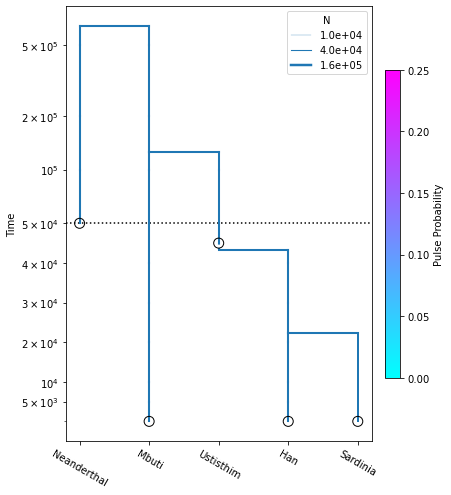

In [6]:
model = createfigure(theta,pop,age,nD,1)
fig = plot_model(model,
                 [ "Neanderthal" , "Mbuti","Ustisthim", "Han","Sardinia"])

In [7]:
plt.savefig('smallsample_figure.pdf')

<Figure size 432x288 with 0 Axes>

In [12]:
sfs = momi.Sfs.load("momi_run/smallsample.sfs.gz")

In [9]:
sfs

In [14]:
#(Mbuti,t=0,N=105800)
#(Sardinia,t=0,N=99600)
#(Han,t=0,N=105200)
#(Ustisthim,t=45000,N=104200)
#(Neanderthal,t=50000,N=105800)
#(@ Mbuti,Neanderthal,t=639200.0000000001,N=105800)
#(@ Ustisthim,Mbuti,t=124800.0,N=105800)
#(@ Han,Ustisthim,t=43200.0,N=104200)
#(@ Sardinia,Han,t=22400.0,N=105200)

testmodel = momi.DemographicModel(N_e=250000)
testmodel.set_data(sfs)
testmodel.add_time_param("tSardinia_Han")
testmodel.add_time_param("tHan_Ustisthim",lower_constraints=["tSardinia_Han"])
testmodel.add_time_param("tUstisthim_Mbuti",lower_constraints=["tHan_Ustisthim"])
testmodel.add_time_param("tMbuti_neanderthal",lower_constraints=["tUstisthim_Mbuti"])



testmodel.add_leaf("Mbuti")
testmodel.add_leaf("Sardinia")
testmodel.add_leaf("Han")
testmodel.add_leaf("UstIshim")
testmodel.add_leaf("Neanderthal")

testmodel.move_lineages("Sardinia","Han",t="tSardinia_Han")
testmodel.move_lineages( "Han","UstIshim",t="tHan_Ustisthim")
testmodel.move_lineages("UstIshim", "Mbuti",t="tUstisthim_Mbuti")
testmodel.move_lineages("Neanderthal","Mbuti" , t="tMbuti_neanderthal")
testmodel.optimize()

            fun: 0.30170038770756336
            jac: array([-3.29906345e-14,  7.58634799e-07,  4.96850471e-13, -1.63919057e-11])
  kl_divergence: 0.30170038770756336
 log_likelihood: -186662.9488282841
        message: 'Converged (|f_n-f_(n-1)| ~= 0)'
           nfev: 37
            nit: 9
     parameters: ParamsDict({'tSardinia_Han': 26939.86815832206, 'tHan_Ustisthim': 26939.86815832206, 'tUstisthim_Mbuti': 115783.28413067036, 'tMbuti_neanderthal': 467775.83003366104})
         status: 1
        success: True
              x: array([2.69398682e+04, 1.00000000e-12, 8.88434160e+04, 3.51992546e+05])

In [29]:
400000,-186662.94882345625
300000,-186662.94882346466
250000,-187041.50532277575
200000,-187041.50532277575
100000,-186662.9488517132

Help on method move_lineages in module momi.demo_model:

move_lineages(pop_from, pop_to, t, p=1, N=None, g=None) method of momi.demo_model.DemographicModel instance
    Move each lineage in pop_from to pop_to at time t with probability p.
    
    The arguments t, p, N, g can be floats or parameter names (strings).
    
    If N or g are specified, then the size or growth rate of pop_to is also
    set at this time, otherwise these parameters remain at their previous
    values.
    
    :param str pop_from: Population lineages are moved from         (backwards in time)
    :param str pop_to: Population lineages are moved to         (backwards in time)
    :param float,str t: Time of the event
    :param float,str p: Probability that lineage in pop_from         moves to pop_to
    :param float,str N: Population size of pop_to
    :param float,str g: Growth rate of pop_to



In [7]:
  m32=[400.0000, 983.3333, 1533.3333 ]
  m43=[400.0000, 983.3333, 1533.3333 ]
      

In [11]:
mu=  1.25e-8 
[i*mu for i in m32]

[4.9999999999999996e-06, 1.2291666249999999e-05, 1.916666625e-05]

In [21]:
testmodel = momi.DemographicModel(N_e=500000)
testmodel.set_data(sfs)
testmodel.add_time_param("tSardinia_Han")
testmodel.add_time_param("tHan_Ustisthim",lower_constraints=["tSardinia_Han"])
testmodel.add_time_param("tUstisthim_Mbuti",lower_constraints=["tHan_Ustisthim"])
testmodel.add_time_param("tMbuti_neanderthal",lower_constraints=["tUstisthim_Mbuti"])

testmodel.add_size_param("nMbuti")
testmodel.add_size_param("nSardinia")
testmodel.add_size_param("nHan")
testmodel.add_size_param("nUstIshim")
testmodel.add_size_param("nNeanderthal")


testmodel.add_leaf("Mbuti",N="nMbuti")
testmodel.add_leaf("Sardinia",N="nSardinia")
testmodel.add_leaf("Han",N="nHan")
testmodel.add_leaf("UstIshim",N="nUstIshim")
testmodel.add_leaf("Neanderthal",N="nNeanderthal")

testmodel.move_lineages("Sardinia","Han",t="tSardinia_Han")
testmodel.move_lineages( "Han","UstIshim",t="tHan_Ustisthim")
testmodel.move_lineages("UstIshim", "Mbuti",t="tUstisthim_Mbuti")
testmodel.move_lineages("Neanderthal","Mbuti" , t="tMbuti_neanderthal")
testmodel.optimize()

            fun: 0.1144905323383196
            jac: array([ 1.90817468e-08,  3.48658049e-07, -8.03063192e-08,  4.19894903e-08,
       -4.28400914e-03, -4.92743900e-03, -2.68684596e-03,  9.54109460e-03,
       -1.19229323e-02])
  kl_divergence: 0.1144905323383196
 log_likelihood: -179148.90686332877
        message: 'Max. number of function evaluations reached'
           nfev: 101
            nit: 17
     parameters: ParamsDict({'tSardinia_Han': 14657.21527161554, 'tHan_Ustisthim': 41176.554811112, 'tUstisthim_Mbuti': 169964.7406206031, 'tMbuti_neanderthal': 529501.6257496728, 'nMbuti': 922839.3617197861, 'nSardinia': 47748.427279122356, 'nHan': 151878.6073632945, 'nUstIshim': 311560.59792168025, 'nNeanderthal': 73545.70470603395})
         status: 3
        success: False
              x: array([1.46572153e+04, 2.65193395e+04, 1.28788186e+05, 3.59536885e+05,
       1.37352105e+01, 1.07737014e+01, 1.19308368e+01, 1.26493491e+01,
       1.12056623e+01])

In [18]:
help(testmodel.add_size_param)

Help on method add_size_param in module momi.demo_model:

add_size_param(name, N0=None, lower=1, upper=10000000000.0, rgen=None) method of momi.demo_model.DemographicModel instance
    Add a size parameter to the demographic model.
    
    :param str name: Parameter name
    :param float N0: Starting value. If None, use ``rgen`` to         randomly sample
    :param float lower: Lower bound
    :param float upper: Upper bound
    :param function rgen: Function to sample a random starting         value. If None, a truncated exponential with rate ``1 / N_e``

